In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import yfinance as yf

assets = ['PG', '^GSPC']  # List of asset tickers

# Create an empty DataFrame to store the data
pf_data = pd.DataFrame()

# Fetch historical stock data using yfinance
for a in assets:
    data = yf.download(a, start='2010-01-01', end='2021-01-01')['Adj Close']
    pf_data[a] = data

pf_data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,PG,^GSPC
Date,,
2010-01-04,40.668770,1132.989990
2010-01-05,40.682072,1136.520020
2010-01-06,40.489109,1137.140015
2010-01-07,40.269524,1141.689941
2010-01-08,40.216297,1144.979980
...,...,...
2020-12-24,128.648193,3703.060059
2020-12-28,129.544983,3735.360107
2020-12-29,129.302124,3727.040039


<AxesSubplot:xlabel='Date'>

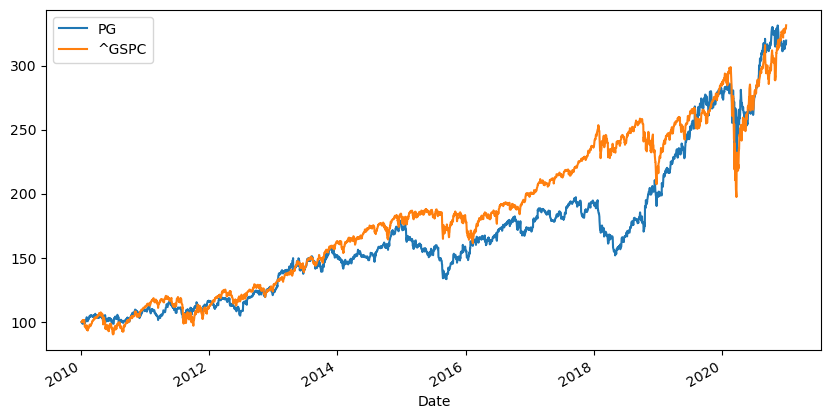

In [3]:
# Normalising and plotting to see how assets are performing throughout the time
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))


In [4]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [5]:
log_returns.mean() * 250

PG       0.104939
^GSPC    0.108247
dtype: float64

In [6]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029198,0.017819
^GSPC,0.017819,0.030591


In [7]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.596228
^GSPC,0.596228,1.000000


In [8]:
num_assets = len(assets)

In [9]:
num_assets

2

In [10]:
arr = np.random.random(2)# creating two random weights 
arr

array([0.8881186 , 0.52941866])

In [11]:
arr[0] + arr[1]# here the weights not equal to 1 

1.4175372642130148

In [12]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)# using this step the weight sum =1 
weights

array([0.58702, 0.41298])

In [13]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [14]:
np.sum(weights * log_returns.mean()) * 250

0.10630494436405162

Expected Portfolio Variance:

In [15]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.0239183035472253

Expected Portfolio Volatility:

In [17]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.15465543491007777

In [18]:
#our goal is to create a graph that visualizes the hypothetical portfolio returns versus volatilities.therefore we will need two objects where we can store data.
# so portfolio return start as an empty list and we intend to fill with randomly generated expected returns.we apply the same for portfolio volatilities.

pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.10499172510948503,
  0.10713330217304942,
  0.10719650619112944,
  0.10607928593816253,
  0.10653558101200562,
  0.10661128781199182,
  0.1063624874136189,
  0.10703607991983989,
  0.10727055236042353,
  0.10574845000480636,
  0.10637211165769314,
  0.10584373887169343,
  0.10668790711238649,
  0.10623802486598942,
  0.10769003004200747,
  0.10668419331140871,
  0.10744008003348367,
  0.10768894282522432,
  0.10798286757996249,
  0.1068005692049057,
  0.10553631891747901,
  0.10646438394651918,
  0.10642581741034728,
  0.10625757969615225,
  0.10634681432373479,
  0.10559180654919764,
  0.10733226978959975,
  0.1058659112585172,
  0.10621974659083738,
  0.10581970700941307,
  0.10673740250579758,
  0.10700048304924331,
  0.10550479297513128,
  0.10558118469400997,
  0.1076762922454374,
  0.10670156637400177,
  0.1067501723430357,
  0.1065427179607513,
  0.10802380201894743,
  0.1077610039062184,
  0.10583073318019325,
  0.10532469578585904,
  0.10736312953646479,
  0.10701637219178

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
#converting the list into numpy arrays     
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10673657, 0.1074141 , 0.10587944, 0.10603878, 0.10688989,
        0.1068662 , 0.10763047, 0.10562992, 0.10536777, 0.10651442,
        0.10501515, 0.1064204 , 0.10520348, 0.10637702, 0.10670838,
        0.10526657, 0.10708819, 0.10585051, 0.1076844 , 0.10743268,
        0.10664755, 0.10640359, 0.10821604, 0.10551066, 0.10639022,
        0.10779819, 0.10668674, 0.10666959, 0.1066042 , 0.10736233,
        0.1050801 , 0.10643798, 0.10776424, 0.10596583, 0.1069865 ,
        0.10620876, 0.10759709, 0.10625083, 0.10557179, 0.1076666 ,
        0.10699059, 0.10689133, 0.10678449, 0.10628949, 0.10561849,
        0.10627688, 0.10676707, 0.10702882, 0.10708972, 0.10708644,
        0.10576579, 0.10692234, 0.10681577, 0.10648507, 0.10681545,
        0.10634439, 0.10776929, 0.1054956 , 0.10607561, 0.10730566,
        0.10532791, 0.10675042, 0.10800104, 0.10755225, 0.10630762,
        0.10609363, 0.10622836, 0.10683637, 0.10817466, 0.10554248,
        0.1057054 , 0.10512427, 0.10685519, 0.10

In [20]:
# we will create a dataframe object containing two columns one for returns and another one for the respective volatilities 
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

Text(0, 0.5, 'Expected Return')

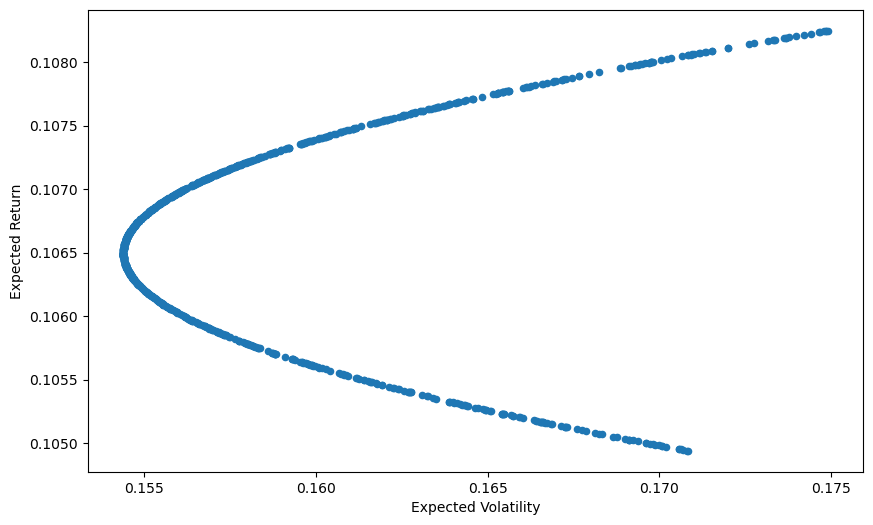

In [21]:
# plotting the efficient frontier 
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

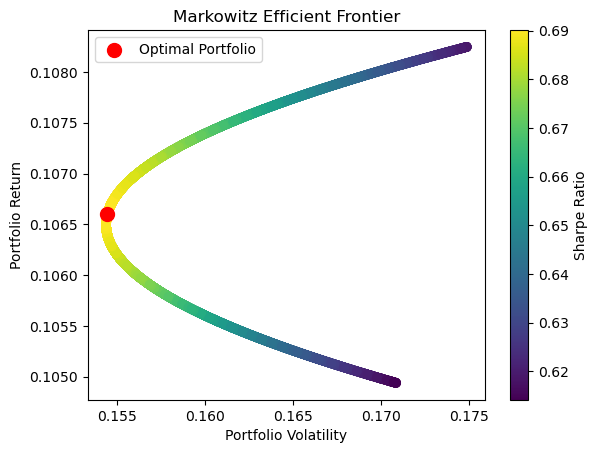

In [22]:
# Number of portfolios to simulate
num_portfolios = 10000

# Initialize lists to store portfolio statistics
portfolio_returns = []
portfolio_volatilities = []
sharpe_ratios = []

# Simulate random portfolios
for _ in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # Ensure weights sum to 1
    
    # Calculate portfolio expected return and volatility
    portfolio_return = np.sum(weights * log_returns.mean()) * 250
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    
    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    
    # Calculate Sharpe ratio and store it
    sharpe_ratio = portfolio_return / portfolio_volatility
    sharpe_ratios.append(sharpe_ratio)

# Convert lists to NumPy arrays
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
sharpe_ratios = np.array(sharpe_ratios)

# Find the portfolio with the highest Sharpe ratio (Tangency Portfolio)
optimal_portfolio_index = sharpe_ratios.argmax()
optimal_return = portfolio_returns[optimal_portfolio_index]
optimal_volatility = portfolio_volatilities[optimal_portfolio_index]

# Plot the Efficient Frontier
plt.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.scatter(optimal_volatility, optimal_return, marker='o', color='r', s=100, label='Optimal Portfolio')
plt.legend()
plt.title('Markowitz Efficient Frontier')
plt.show()
